In [113]:
from igraph import Graph
import numpy as np 

In [263]:
def read_gml(path):
    g = Graph.Read_GML(path)
    adj = g.get_adjacency()
    n = adj.shape[0]
    a = np.array([adj[i] for i in range(n)])
    
    return a

In [433]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 正常显示负号


def distance(metric):
    def f(x, y):
        _ = np.vstack([x,y])
        return pdist(_, metric)[0]
    return f

def cluster(a, method, metric):
    font1 = {
        'weight': 'normal',
        'size': 30,
    }
    
    z = linkage(a, method=method, metric=distance(metric))
    fig = plt.figure(figsize=(25, 10))
    dn = dendrogram(z)
    plt.title('{} {}'.format(metric, method),font1)
    plt.savefig('clusterTree_{}_{}.svg'.format(metric, method))
    return z

In [444]:
def computeQ(a, z): 
    n = a.shape[0]
    m = int(np.sum(a) / 2)
    k = [np.sum(a[i]) for i in range(n)]
    c = np.arange(n_v)
    def connect(a, b, it):
        buffer[it + n] = buffer[a].union(buffer[b])
        del buffer[a]
        del buffer[b] 
        temp = list(buffer[it + n].copy())
        tar = np.min(temp)
        for i in range(len(temp)):
            c[temp[i]] = tar

    buffer = {k: {k} for k in range(n)}
    q = list(range(n_v))   # 合并i次的Q值
#     print(z)

    for it, line in enumerate(z):
        connect(int(line[0]), int(line[1]), it)
        q[it + 1] = np.sum([[(a[v][w] - k[v]*k[w]/(2*m)) * (c[v]==c[w])
                         for v in range(n) ]for w in range(n)]) / (2*m) 
#         print(it+1, q[it + 1], line[0], line[1])
        print(c)

    return q

In [445]:
def main(path, method, metric):
    font = {
        'weight': 'normal',
        'size': 13,
    }
    font1 = {
        'weight': 'normal',
        'size': 18,
    }
    A = read_gml(path)
    Z = cluster(A, method, metric)
    Q = computeQ(A, Z)
    print(max(Q))
    X = list(range(1, A.shape[0] + 1))
#     X.reverse()
#     Q.reverse()
    print(Q)
    plt.figure()
    plt.plot(X, Q)
    plt.title('{} {}'.format(metric, method), font1)
    
    plt.xlabel('合并次数', font) 
    plt.ylabel('modularity Q', font)
    
    plt.savefig('Q_{}_{}_{: 0.5f}_{: 0.5f}.svg'.format(
        metric, method, max(Q), Q[-2]))

d:\python36\lib\site-packages\ipykernel_launcher.py:30: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix


0
[0, -0.05013149243918475, -0.05046022353714662, -0.05111768573307035, -0.05210387902695595, -0.05341880341880341, -0.055062458908612756, -0.055226824457593686, -0.056213017751479286, -0.05793885601577908, -0.05892504930966469, -0.059911242603550297, -0.0604043392504931, -0.06780078895463511, -0.07873109796186718, -0.04240631163708086, -0.046515450361604205, -0.048980933596318214, -0.05456936226166995, -0.04865220249835634, -0.05687047994740302, -0.13551939513477973, -0.14817554240631162, -0.13354700854700854, -0.13625904010519393, -0.14168310322156477, -0.14119000657462197, -0.13601249178172253, -0.13995726495726496, -0.11826101249178173, -0.09870151216305063, -0.06714332675871137, -0.021038790269559533, -2.419716848542008e-17]
0
[0, -0.05013149243918475, -0.05046022353714662, -0.05111768573307035, -0.05210387902695595, -0.05341880341880341, -0.055062458908612756, -0.055391190006574616, -0.05588428665351742, -0.056870479947403026, -0.057856673241288625, -0.05867850098619329, -0.06032

d:\python36\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


0.37146614069691
[0, -0.05013149243918475, -0.05046022353714662, -0.05111768573307035, -0.05210387902695595, -0.05341880341880341, -0.055062458908612756, -0.05604865220249836, -0.05703484549638396, -0.058021038790269555, -0.05851413543721236, -0.06245890861275477, -0.0626232741617357, -0.06591058514135437, -0.07051282051282051, -0.07569033530571992, -0.07733399079552926, -0.07815581854043394, -0.07716962524654833, -0.07963510848126233, -0.08357988165680474, -0.08703155818540434, -0.07914201183431951, -0.07018408941485865, -0.051775147928994084, -0.052761341222879676, -0.04109138724523339, 0.017833662064431304, 0.029914529914529923, 0.18384286653517426, 0.15622945430637739, 0.14192965154503617, 0.37146614069691, -2.419716848542008e-17]
0.37146614069691
[0, -0.05013149243918475, -0.05046022353714662, -0.05111768573307035, -0.05210387902695595, -0.05341880341880341, -0.055062458908612756, -0.05604865220249836, -0.05703484549638396, -0.058021038790269555, -0.05851413543721236, -0.062458908

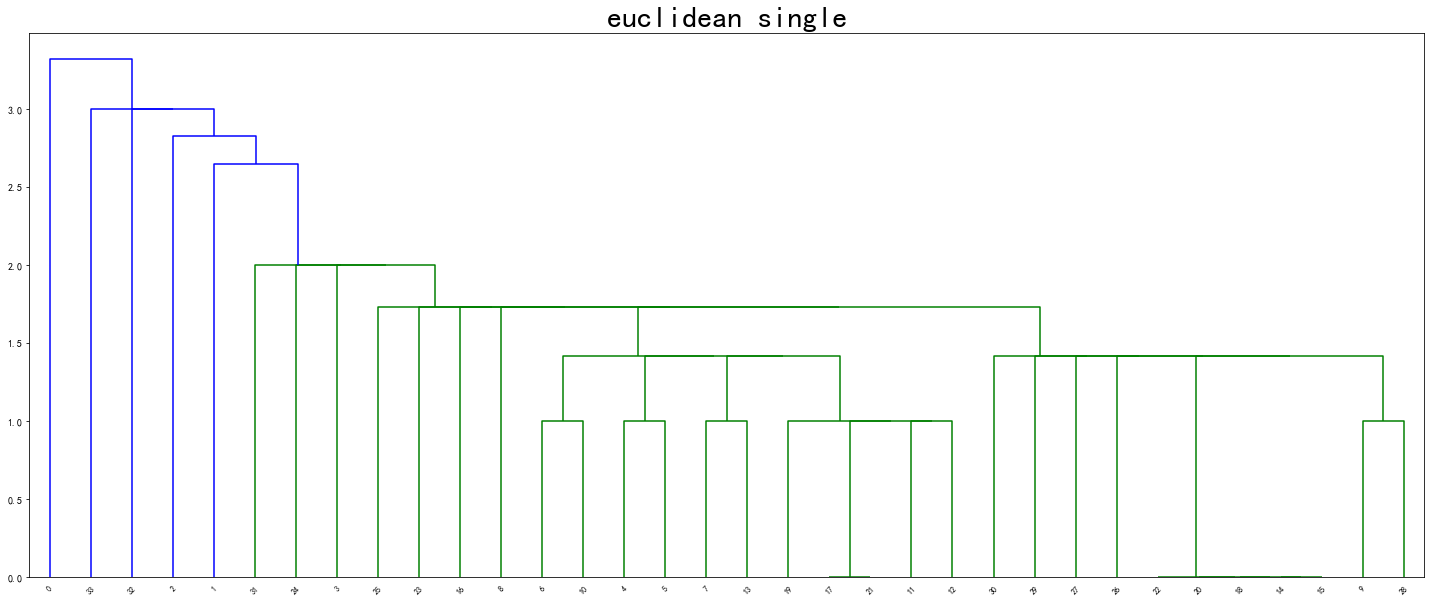

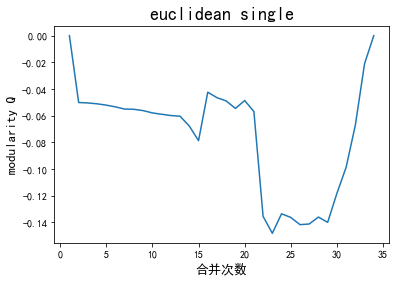

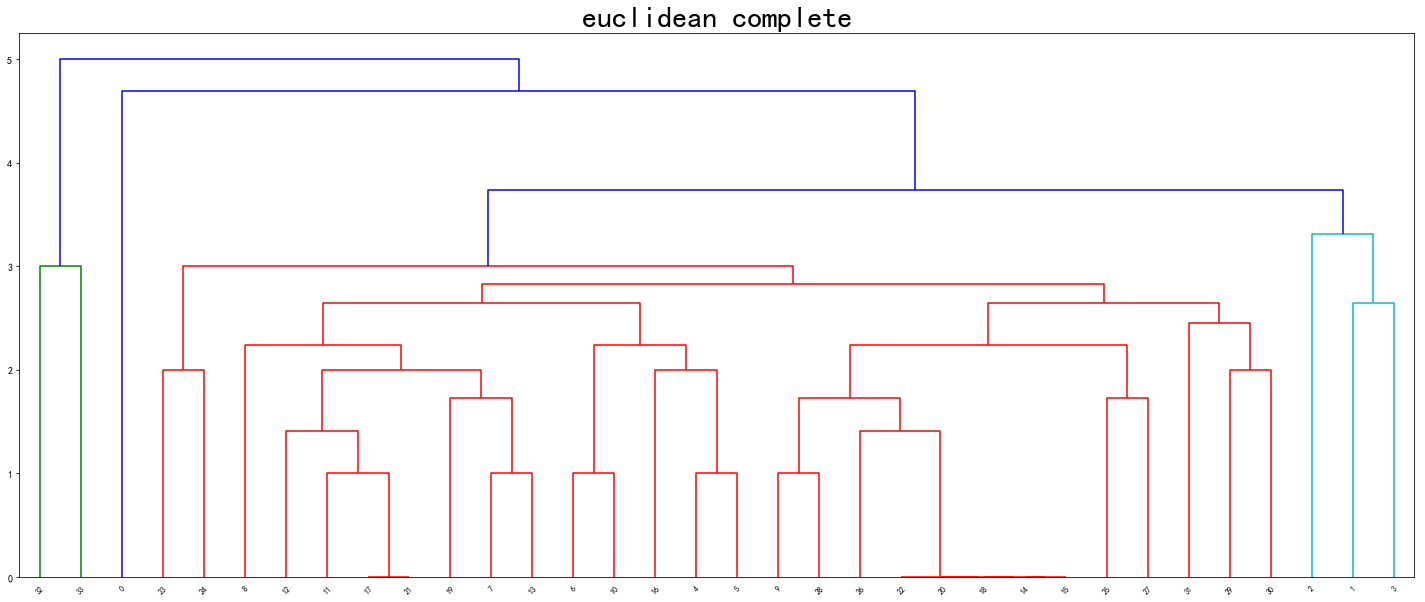

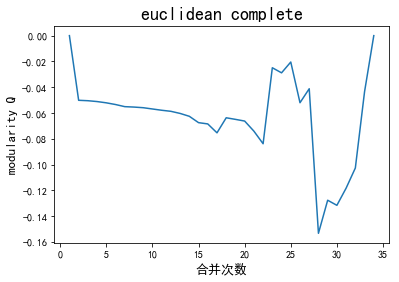

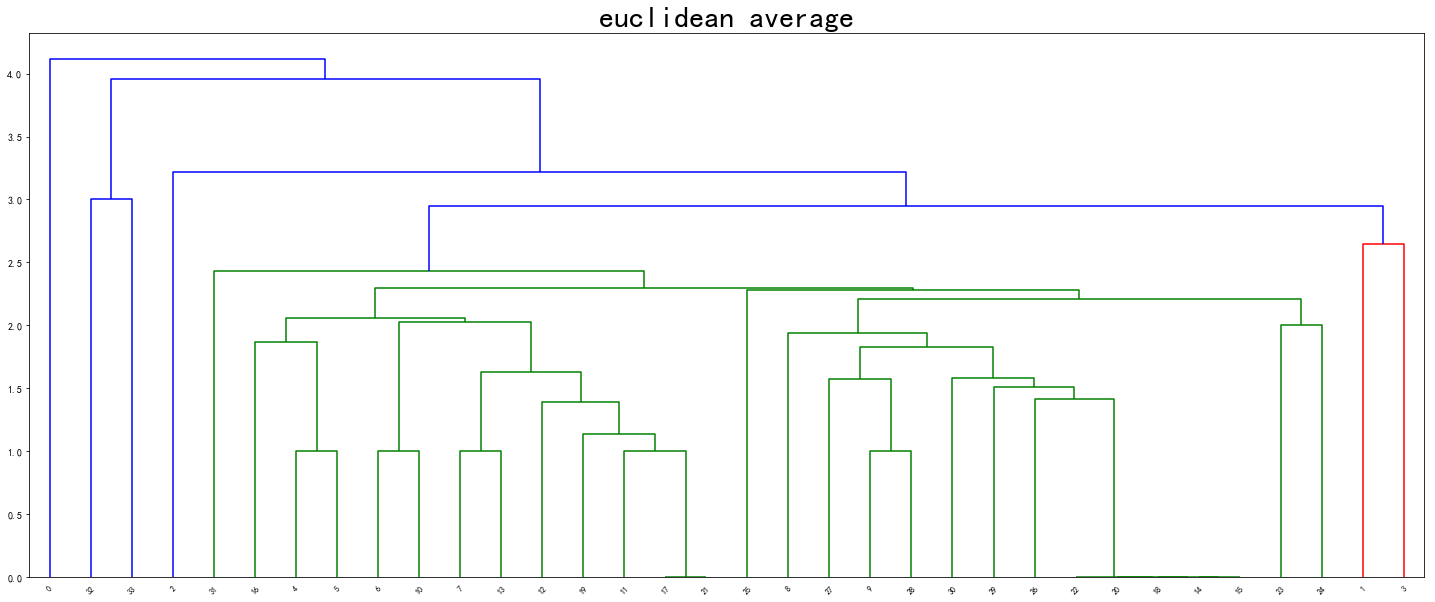

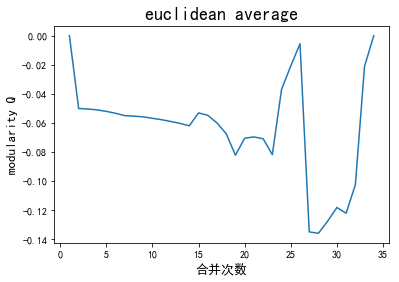

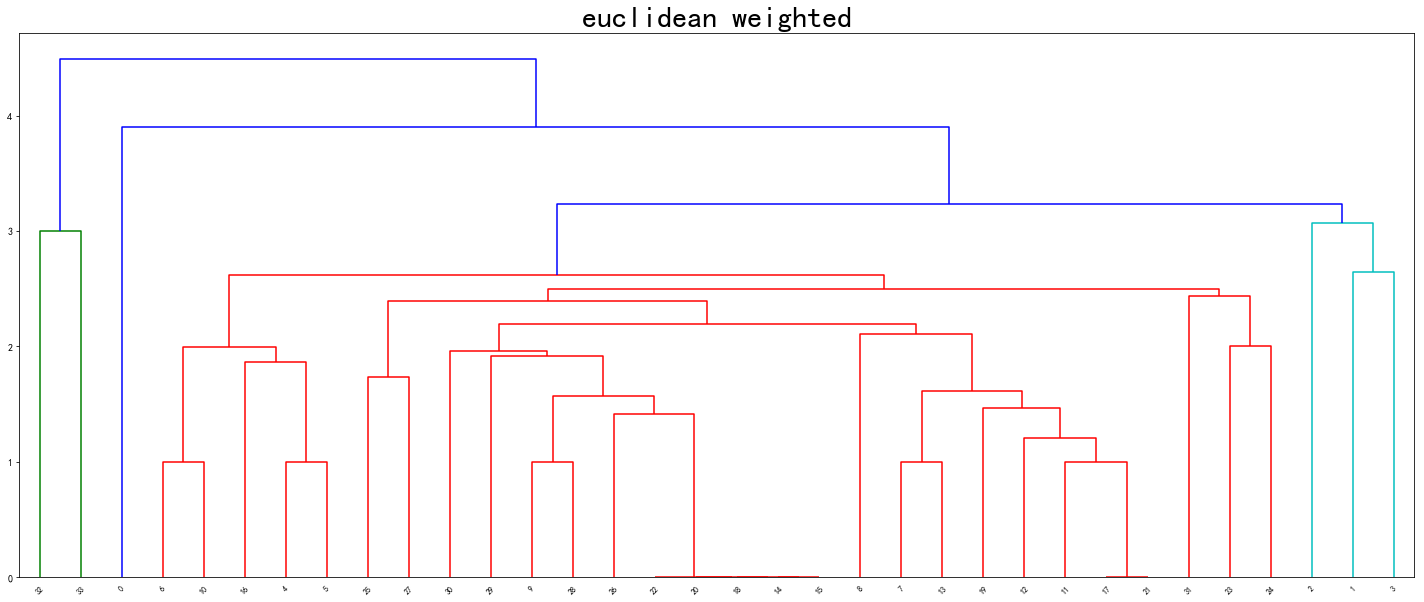

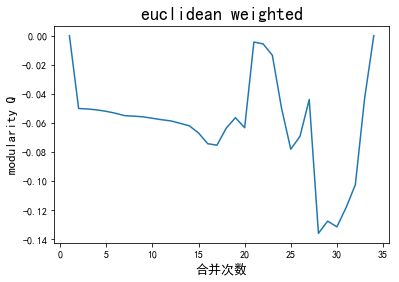

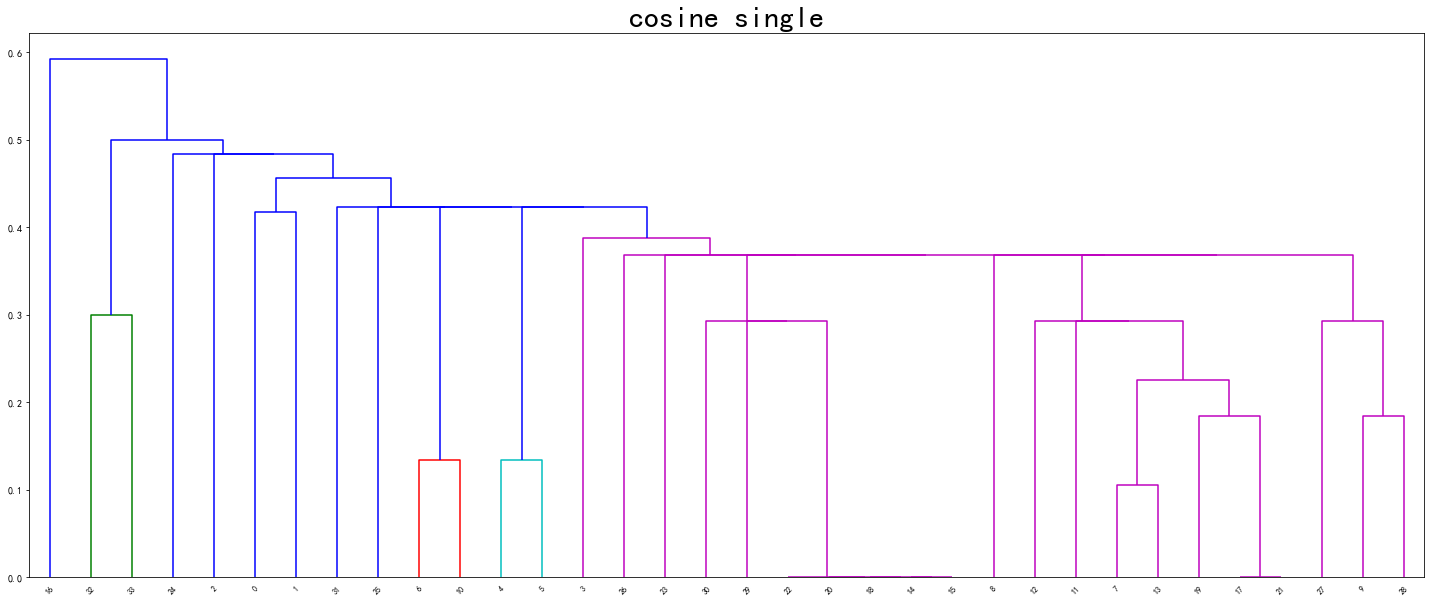

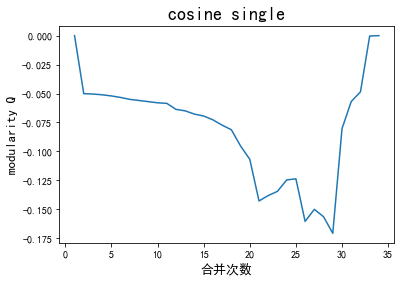

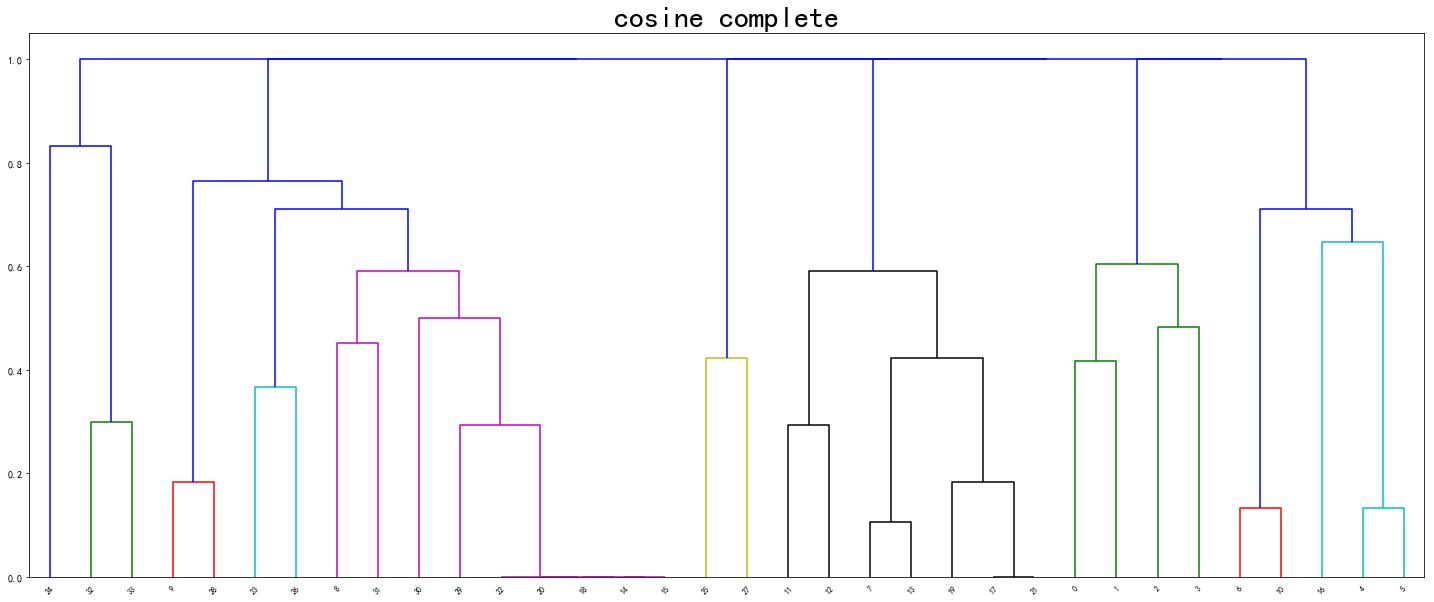

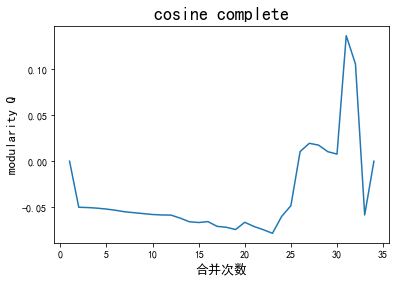

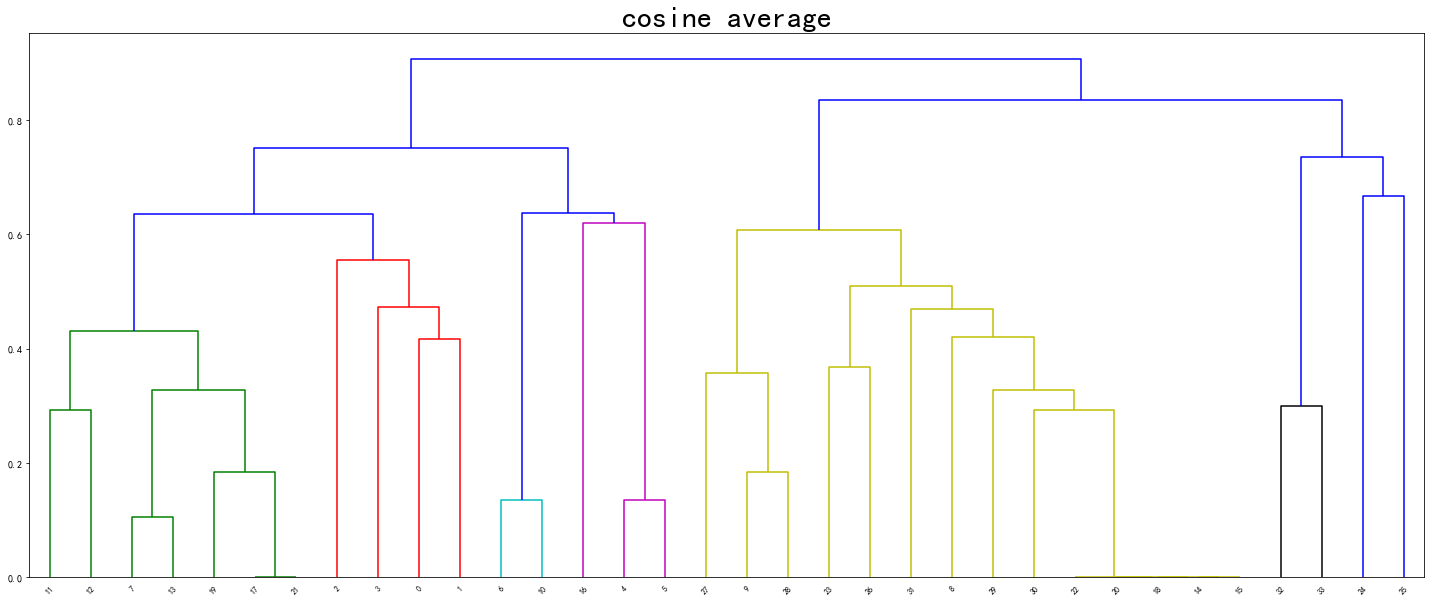

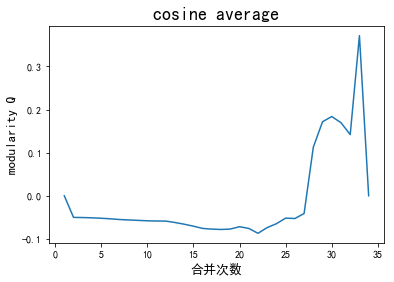

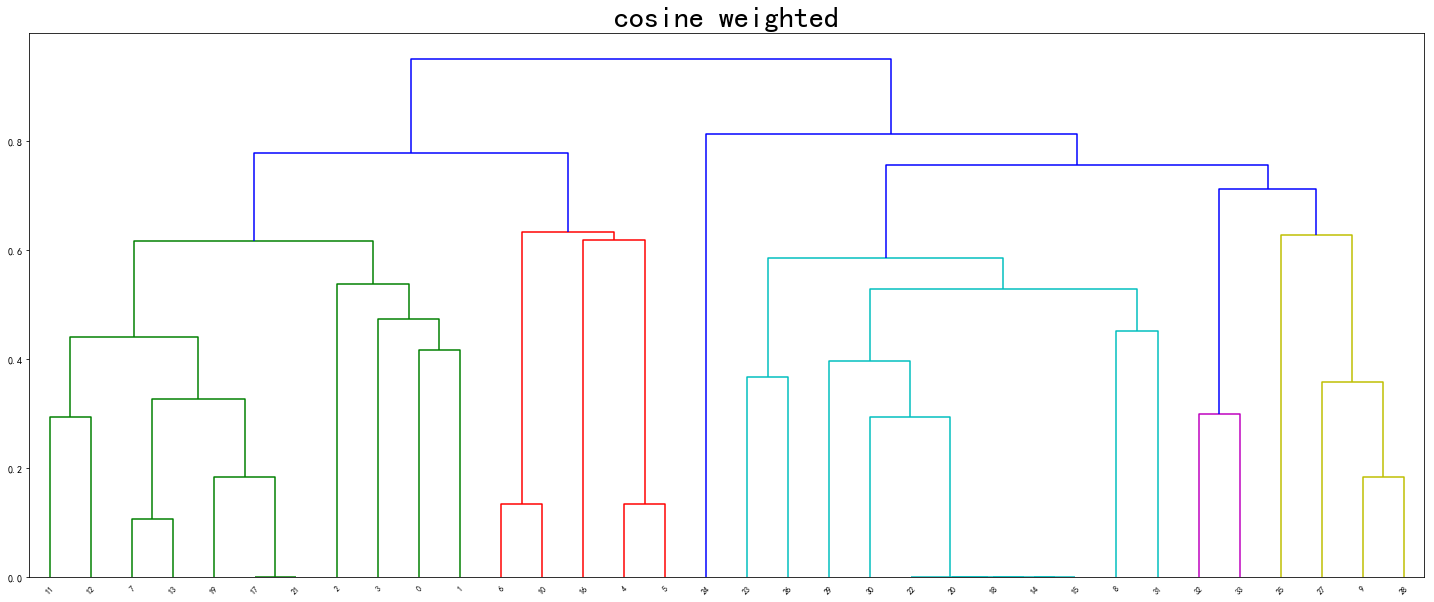

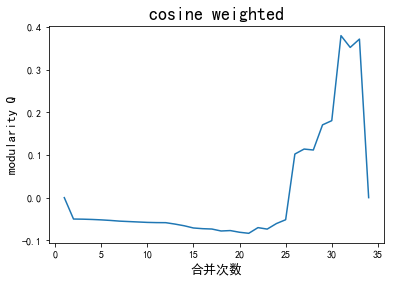

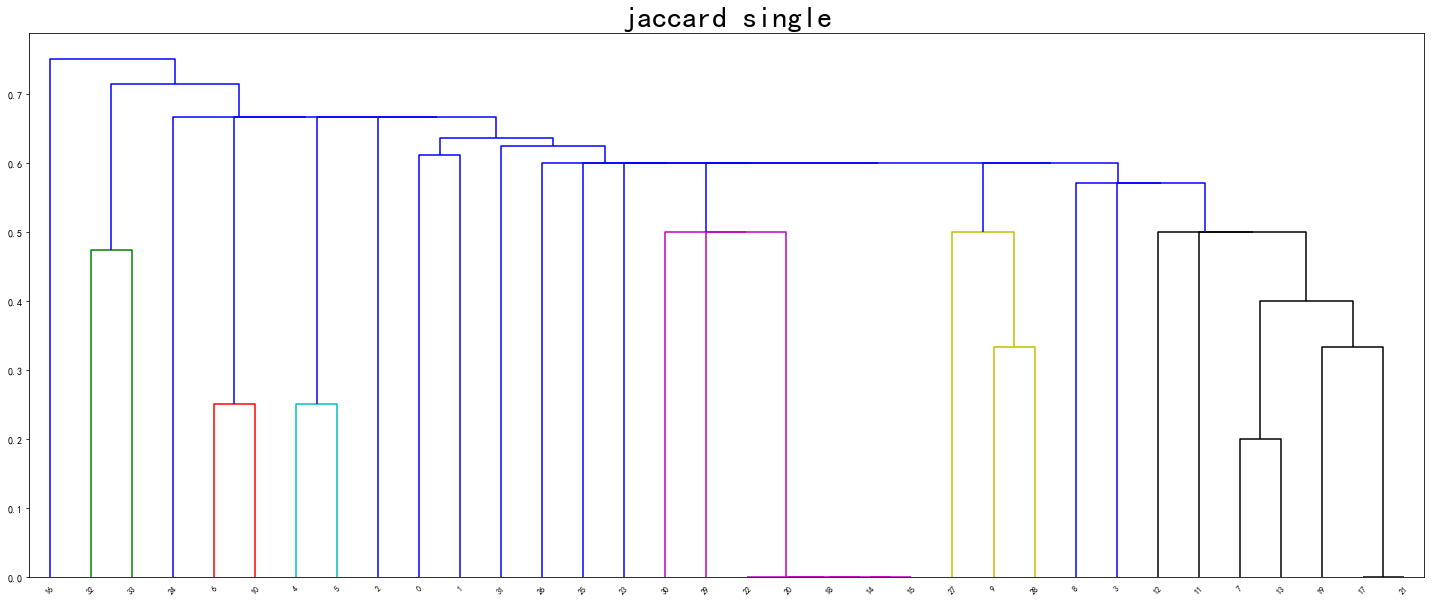

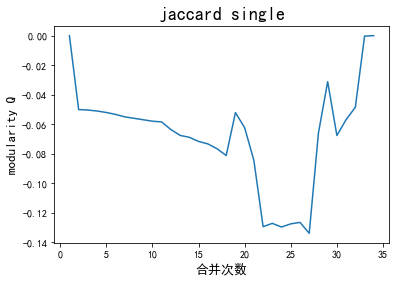

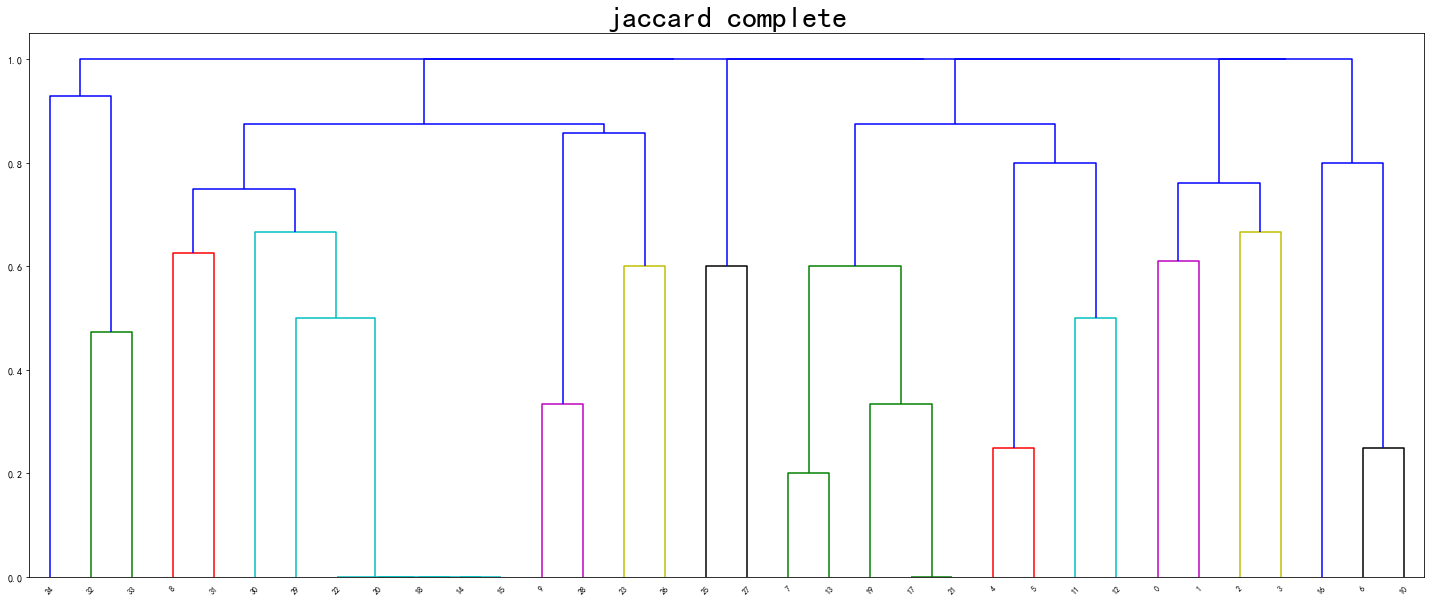

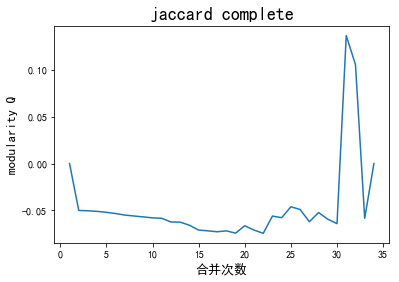

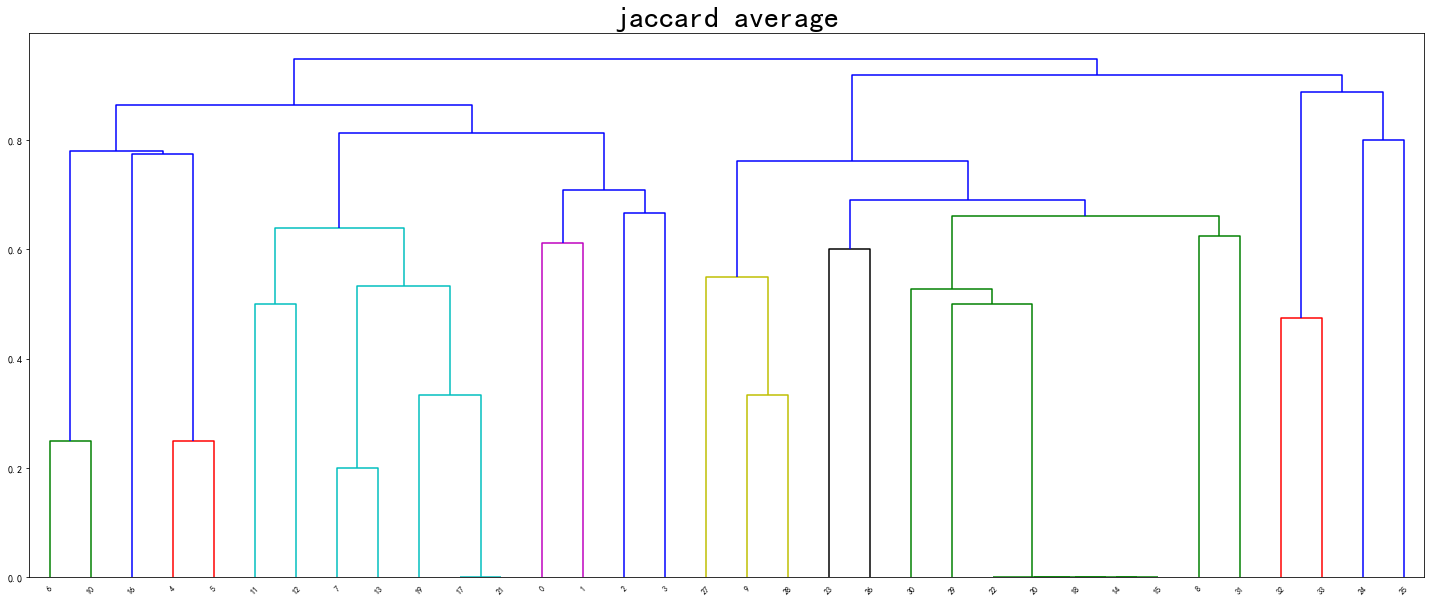

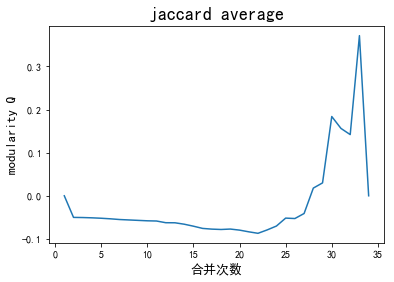

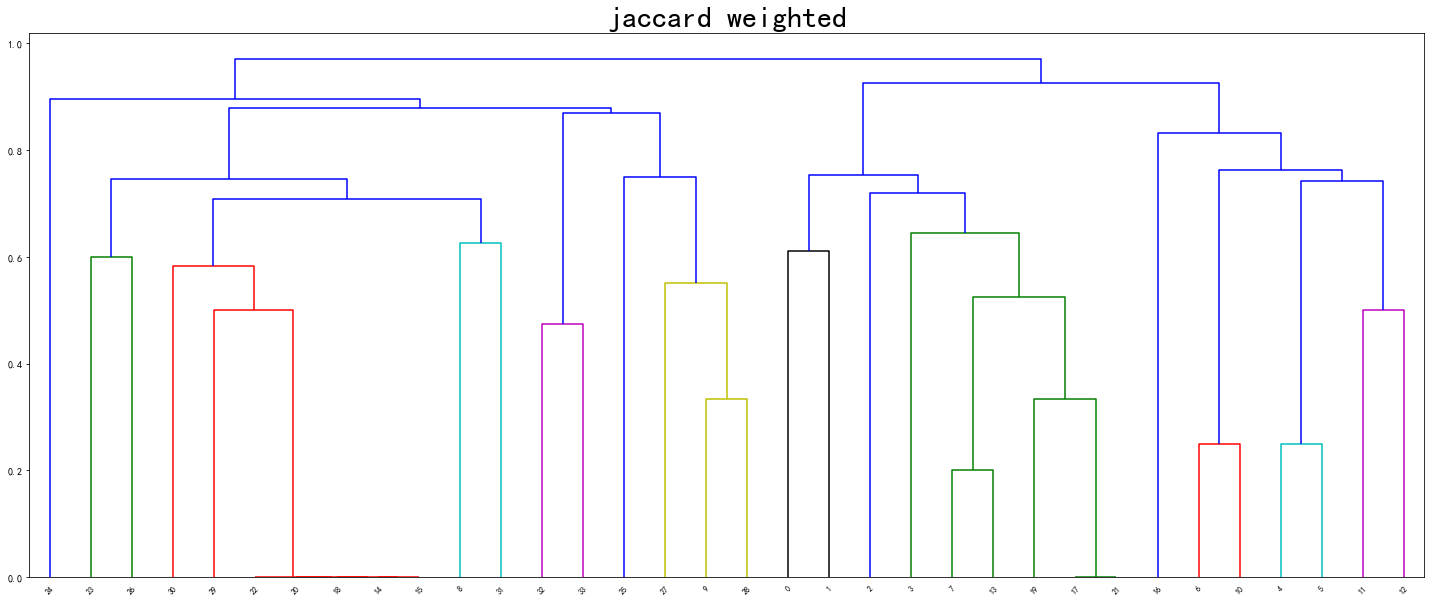

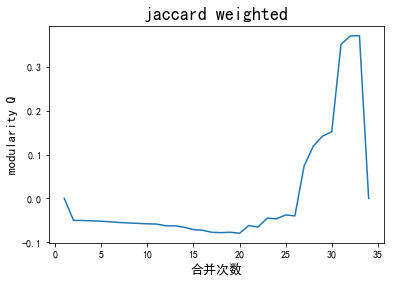

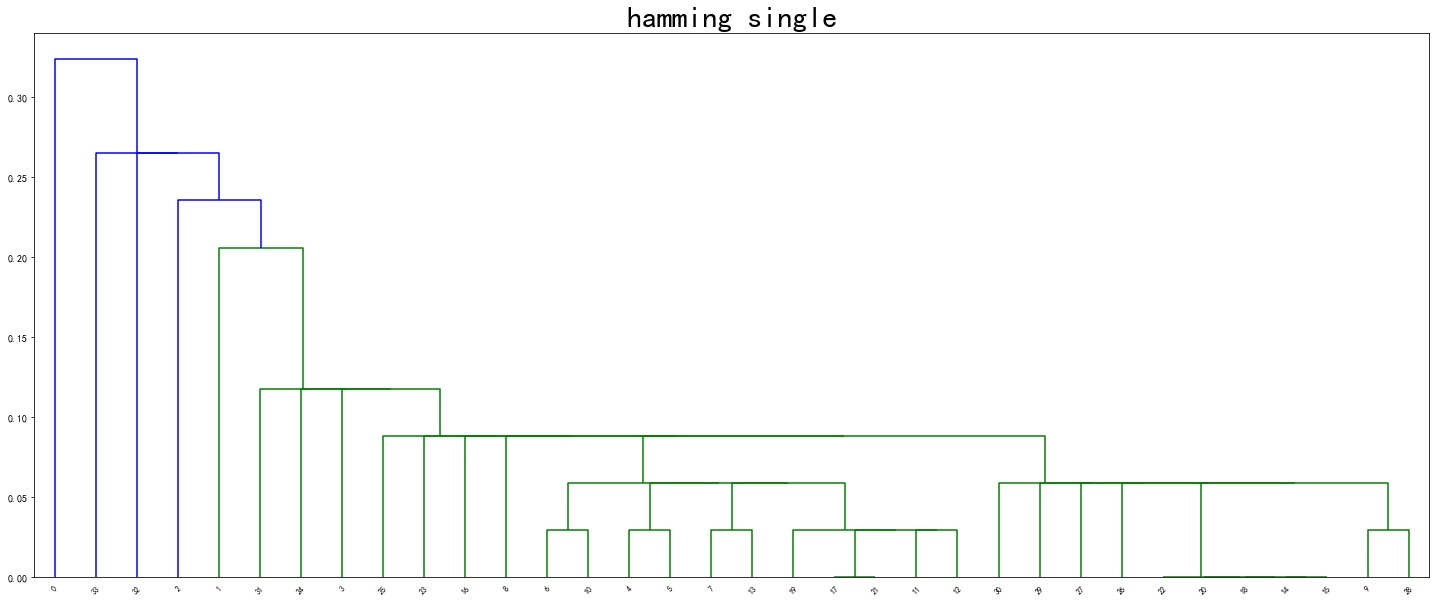

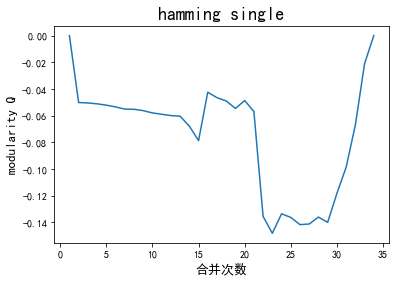

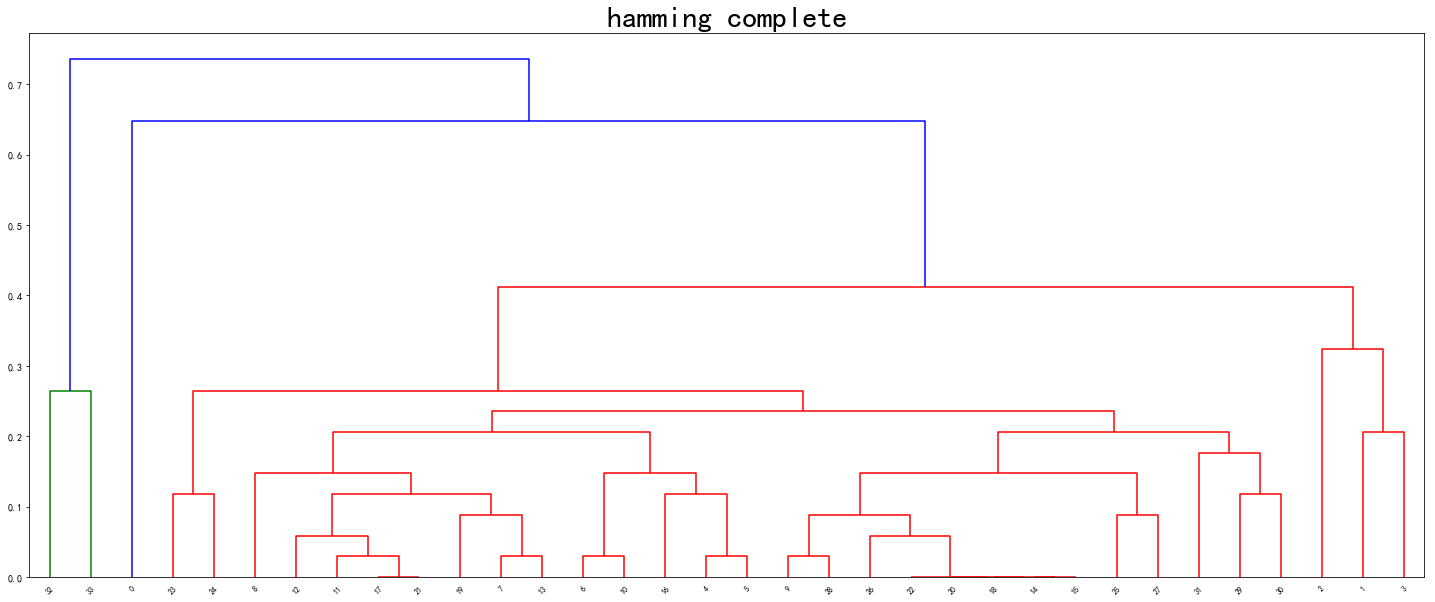

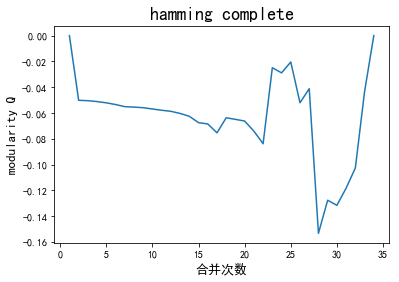

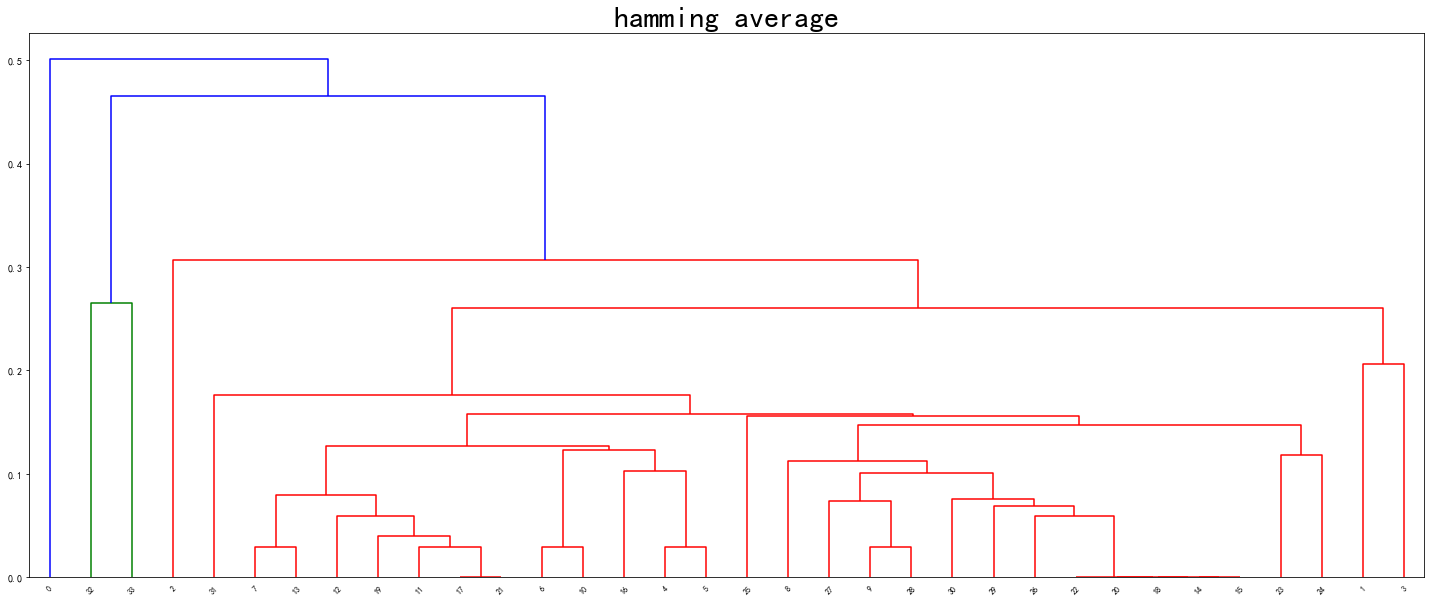

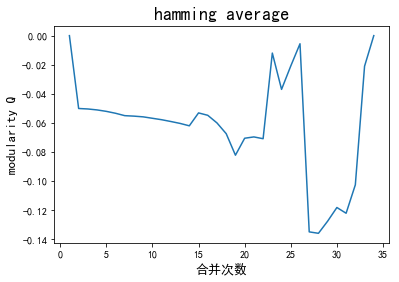

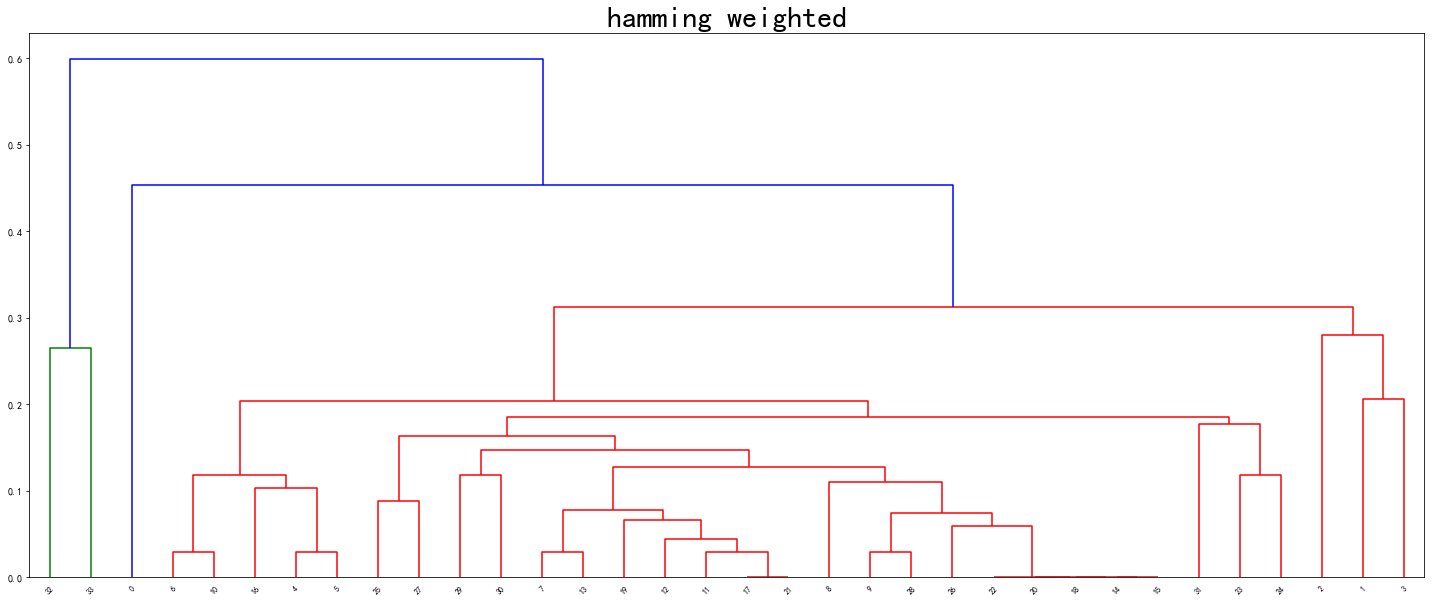

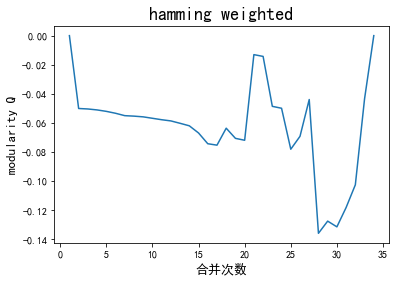

In [442]:
file_path = 'karate.gml'
# euclidean
for metric in ['euclidean', 'cosine', 'jaccard', 'hamming']:
    for method in ["single", "complete", "average", "weighted"]:
        main('karate.gml', method=method, metric=metric)